## O que é o IDHM

Links importantes<br/>
https://www.undp.org/pt/brazil/o-que-%C3%A9-o-idhm<br/>
Base de dados Ipea<br/>
https://www.ipea.gov.br/ipeageo/arquivos/bases/IDH_2010.xls

O Índice de Desenvolvimento Humano Municipal (IDHM) é uma medida composta de indicadores de três dimensões do desenvolvimento humano: longevidade, educação e renda. O índice varia de 0 a 1. Quanto mais próximo de 1, maior o desenvolvimento humano.

O IDHM brasileiro segue as mesmas três dimensões do IDH Global - longevidade, educação e renda, mas vai além: adequa a metodologia global ao contexto brasileiro e à disponibilidade de indicadores nacionais. Embora meçam os mesmos fenômenos, os indicadores levados em conta no IDHM são mais adequados para avaliar o desenvolvimento dos municípios brasileiros. Assim, o IDHM - incluindo seus três componentes, IDHM Longevidade, IDHM Educação e IDHM Renda - conta um pouco da história dos municípios em três importantes dimensões do desenvolvimento humano durantes duas décadas da história brasileira.

In [1]:
#Libs

import pandas as pd
import numpy as np

#libs gráficas
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

#Avisos
import warnings
warnings.filterwarnings('ignore')

In [25]:
idhm = pd.read_excel('../Data/Fase 1/IDH_2010.xls')
idhm.head()

,ANO,Código da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Município,Esperança de vida ao nascer,Taxa de fecundidade total,Mortalidade infantil,Mortalidade até 5 anos de idade,Razão de dependência,...,População de 15 a 17 anos.1,População de 18 anos ou mais.1,População total em domicílios particulares permanentes,"População total em domicílios particulares permanentes, exceto com renda nula",Subíndice de escolaridade - IDHM Educação,Subíndice de frequência escolar - IDHM Educação,IDHM,IDHM Educação,IDHM Longevidade,IDHM Renda
0,2010,11,Rondônia,110001,ALTA FLORESTA D'OESTE,70.75,2.24,23.8,25.49,47.37,...,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657
1,2010,11,Rondônia,110002,ARIQUEMES,73.36,1.91,19.2,20.53,46.68,...,5256,60213,89766,88730,0.514,0.648,0.702,0.600,0.806,0.716
2,2010,11,Rondônia,110003,CABIXI,70.39,2.15,24.8,26.58,48.12,...,381,4306,6303,6156,0.357,0.700,0.650,0.559,0.757,0.650
3,2010,11,Rondônia,110004,CACOAL,74.27,1.90,14.3,15.38,43.79,...,4547,54356,78141,76876,0.488,0.698,0.718,0.620,0.821,0.727
4,2010,11,Rondônia,110005,CEREJEIRAS,72.94,2.12,18.1,19.42,45.67,...,1033,11786,16942,16815,0.430,0.712,0.692,0.602,0.799,0.688


In [5]:
print(f'Tamanho do nosso Dataset: {idhm.shape}')

Tamanho do nosso Dataset: (5564, 237)


In [6]:
print(f'Quantidade de dados nulos: {idhm.isnull().sum().sum()}')

Quantidade de dados nulos: 0


In [7]:
df_idhm = idhm[['Nome da Unidade da Federação', 'Município', 'IDHM', 'IDHM Educação', 'IDHM Longevidade', 'IDHM Renda']]

In [8]:
df_idhm.columns = ['UF', 'municipio', 'idhm', 'idhm_educacao', 'idhm_longevidade', 'idhm_renda']

In [9]:
df_idhm.head()

,UF,municipio,idhm,idhm_educacao,idhm_longevidade,idhm_renda
0,Rondônia,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,Rondônia,ARIQUEMES,0.702,0.600,0.806,0.716
2,Rondônia,CABIXI,0.650,0.559,0.757,0.650
3,Rondônia,CACOAL,0.718,0.620,0.821,0.727
4,Rondônia,CEREJEIRAS,0.692,0.602,0.799,0.688


In [10]:
df_idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564 entries, 0 to 5563
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UF                5564 non-null   object 
 1   municipio         5564 non-null   object 
 2   idhm              5564 non-null   float64
 3   idhm_educacao     5564 non-null   float64
 4   idhm_longevidade  5564 non-null   float64
 5   idhm_renda        5564 non-null   float64
dtypes: float64(4), object(2)
memory usage: 260.9+ KB


In [11]:
df_idhm.nunique()

UF                    27
municipio           5329
idhm                 349
idhm_educacao        466
idhm_longevidade     220
idhm_renda           390
dtype: int64

In [12]:
df_idhm.describe()

,idhm,idhm_educacao,idhm_longevidade,idhm_renda
count,5564.000000,5564.000000,5564.000000,5564.000000
mean,0.659168,0.559102,0.801568,0.642891
std,0.072000,0.093334,0.044684,0.080658
min,0.418000,0.207000,0.672000,0.400000
25%,0.599000,0.490000,0.769000,0.572000
50%,0.665000,0.560000,0.808000,0.654000
75%,0.718000,0.631000,0.836000,0.707000
max,0.862000,0.825000,0.894000,0.891000


Separar os municípios de São Paulo


In [13]:
df_idhm_esp = df_idhm.loc[df_idhm['UF']=='São Paulo']

Verificar se todos os municípios de SP foram selecionados. Na seleção tem que haver 645 Municípios.

In [14]:
print(f'Quantidade de Municípios do Estado de São Paulo: {df_idhm_esp.UF.count()}')

Quantidade de Municípios do Estado de São Paulo: 645


#### Criar Função para classificar os municípios conforme o IDHM
0 - 0,499 - Baixo Desenvolvimento Humano<br/>
0,5 - 0,799 - Médio Desenvolvimento Humano<br/>
0,8 - 1 - Alto Desenvolvimento Humano

In [15]:
def idhm_class(df):
    if df['idhm']>=0.8:
        return 'Alto Desenvolvimento Humano'
    elif df['idhm']<0.499:
        return 'Baixo Desenvolvimento Humano'
    else:
        return 'Médio Desenvolvimento Humano'

In [16]:
df_idhm_esp['classe'] = df_idhm_esp.apply(idhm_class, axis=1)
df_idhm_esp.head()

,UF,municipio,idhm,idhm_educacao,idhm_longevidade,idhm_renda,classe
3265,São Paulo,ADAMANTINA,0.790,0.750,0.852,0.772,Médio Desenvolvimento Humano
3266,São Paulo,ADOLFO,0.730,0.648,0.844,0.710,Médio Desenvolvimento Humano
3267,São Paulo,AGUAÍ,0.715,0.606,0.858,0.703,Médio Desenvolvimento Humano
3268,São Paulo,ÁGUAS DA PRATA,0.781,0.716,0.886,0.750,Médio Desenvolvimento Humano
3269,São Paulo,ÁGUAS DE LINDÓIA,0.745,0.675,0.846,0.725,Médio Desenvolvimento Humano


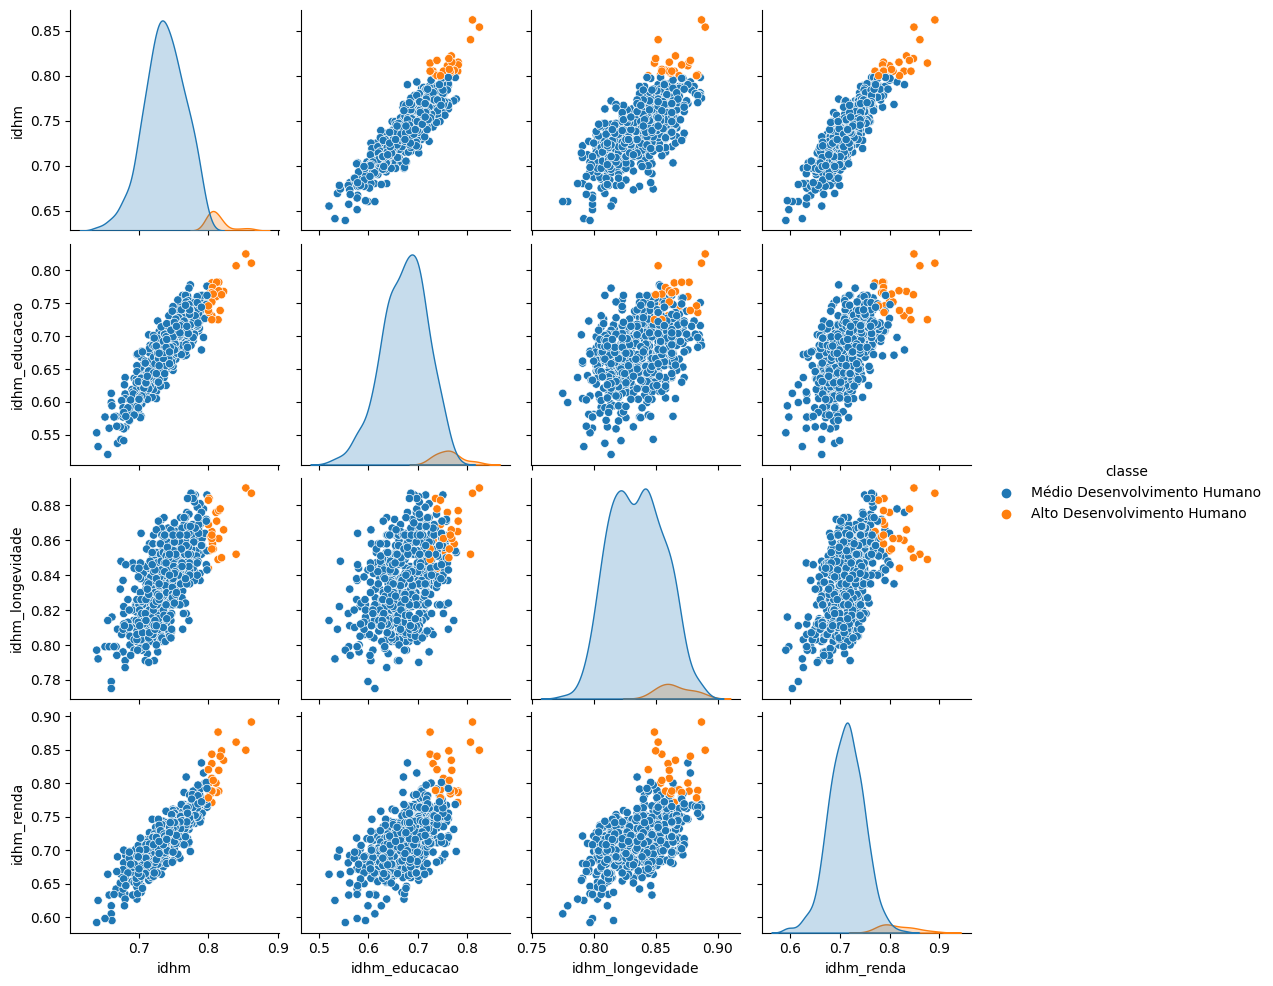

In [17]:
sns.pairplot(df_idhm_esp, hue = 'classe')

Análise por Municípios de SP

In [18]:
plt.figure(figsize=(24,60))

fig1 = px.box(df_idhm_esp, y='idhm', color = 'classe')
fig1.update_layout(title_text="Boxsplot IDHM")
fig2 = px.box(df_idhm_esp, y='idhm_educacao', color = 'classe')
fig2.update_layout(title_text="Boxsplot IDHM com o indicador de Educação")
fig3 = px.box(df_idhm_esp, y='idhm_longevidade', color = 'classe')
fig3.update_layout(title_text="Boxsplot IDHM com o indicador de Longevidade")
fig4 = px.box(df_idhm_esp, y='idhm_renda', color = 'classe')
fig4.update_layout(title_text="Boxsplot IDHM com o indicador de Renda")

fig1.show()
fig2.show()
fig3.show()
fig4.show()


<Figure size 2400x6000 with 0 Axes>

Grafico de Pizza para comparar as proporções entre classes

In [19]:
fig5 = go.Figure(go.Pie(labels=df_idhm_esp['classe'], values=df_idhm_esp['idhm'], hole = 0.5))
fig5.update_layout(title_text="IDHM Estado de São Paulo")
fig5.show()

In [20]:
df_idhm_esp.columns

Index(['UF', 'municipio', 'idhm', 'idhm_educacao', 'idhm_longevidade',
       'idhm_renda', 'classe'],
      dtype='object')

In [21]:
fig6 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig6.add_trace(go.Pie(labels=df_idhm_esp['classe'], values=df_idhm_esp['idhm'], name="IDHM"),
              1, 1)
fig6.add_trace(go.Pie(labels=df_idhm_esp['classe'], values=df_idhm_esp['idhm_educacao'], name="IDHM Escolaridade"),
              1, 2)

# Tamanho do buraco da rosca
fig6.update_traces(hole=0.6, hoverinfo="label+percent+name")

fig6.update_layout(
    title_text="Comparando as Características do IDHM com o indicador de Escolaridade",
    # OPrganizando as anotações no gra´fico.
    annotations=[dict(text='IDHM', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Escolaridade', x=0.87, y=0.5, font_size=20, showarrow=False)])

fig6.show()

In [22]:
fig7 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig7.add_trace(go.Pie(labels=df_idhm_esp['classe'], values=df_idhm_esp['idhm'], name="IDHM"),
              1, 1)
fig7.add_trace(go.Pie(labels=df_idhm_esp['classe'], values=df_idhm_esp['idhm_longevidade'], name="IDHM Longevidade"),
              1, 2)

# Tamanho do buraco da rosca
fig7.update_traces(hole=0.6, hoverinfo="label+percent+name")

fig7.update_layout(
    title_text="Comparando as Características do IDHM com o indicador de Longevidade",
    # OPrganizando as anotações no gra´fico.
    annotations=[dict(text='IDHM', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Longevidade', x=0.87, y=0.5, font_size=20, showarrow=False)])

fig7.show()

In [23]:
fig8 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig8.add_trace(go.Pie(labels=df_idhm_esp['classe'], values=df_idhm_esp['idhm'], name="IDHM"),
              1, 1)
fig8.add_trace(go.Pie(labels=df_idhm_esp['classe'], values=df_idhm_esp['idhm_renda'], name="IDHM Renda"),
              1, 2)

# Tamanho do buraco da rosca
fig8.update_traces(hole=0.6, hoverinfo="label+percent+name")

fig8.update_layout(
    title_text="Comparando as Características do IDHM com o indicador de Renda",
    # OPrganizando as anotações no gra´fico.
    annotations=[dict(text='IDHM', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Renda', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig8.show()

Exportando a Base

In [27]:
df_idhm_esp.to_csv("../Data/Fase 1/IDHM_ESP.csv", encoding = 'utf-8', index = False)